# Cluster Visualisation

Trying to keep this notebook as short and snappy as possible. Just reading in the groupby-mean results of the weekends/weekdays data and running K-Means. Based on the outputs of the ClusteringTest notebook, we know that the following cluster config will work best:

* Weekends: 8 Clusters
* Weekdays: 10 Clusters

We are good with hardcoding this into the notebook.

In [1]:
! ls -l ../dataset/

total 156656392
-rw-r--r--  1 sarmadtarar  staff      3258527 23 Apr 16:47 dataset_sample.csv
-rw-r--r--@ 1 sarmadtarar  staff    176473873 27 Apr 13:30 groupby_results_weekdayy_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff    169368141 27 Apr 13:30 groupby_results_weekend_groupby_means.csv
-rw-r--r--@ 1 sarmadtarar  staff  39929480142 24 Apr 17:12 qut_it_capstone_ailbatross_20181029_nmi_data_20181029.csv
-rw-r--r--@ 1 sarmadtarar  staff  28630797979 25 Apr 16:20 weekday_split_weekdays.csv
-rw-r--r--@ 1 sarmadtarar  staff  11298682219 25 Apr 16:30 weekday_split_weekends.csv


In [10]:
# Reading the Groupby-Mean output

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def get_df_from_csv(filename):
    scaler = MinMaxScaler()
    numeric_columns = [f'ekw{i+1}' for i in range(48)]
    df = pd.read_csv(filename, index_col='nmi_uuid')
    df[numeric_columns] = scaler.fit_transform(
                                    df[numeric_columns].transpose()
                                ).transpose()
    return df[(df[numeric_columns] > 0.99).any(axis=1)]

weekend_df = get_df_from_csv('../dataset/groupby_results_weekend_groupby_means.csv')
weekday_df = get_df_from_csv('../dataset/groupby_results_weekdayy_groupby_means.csv')

chosen_df = weekday_df

# Run K-Means

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 289181.3052267357
start iteration
done sorting
end inner loop
Iteration 1, inertia 274098.46043746173
start iteration
done sorting
end inner loop
Iteration 2, inertia 270623.90566780017
start iteration
done sorting
end inner loop
Iteration 3, inertia 269352.4809968881
start iteration
done sorting
end inner loop
Iteration 4, inertia 268777.2324640808
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 293965.5681745115
start iteration
done sorting
end inner loop
Iteration 1, inertia 278073.5100001439
start iteration
done sorting
end inner loop
Iteration 2, inertia 274736.04780813085
start iteration
done sorting
end inner loop
Iteration 3, inertia 273162.37867214624
start iteration
done sorting
end inner loop
Iteration 4, inertia 272118.2898730058
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 284768.91991672653
start iter

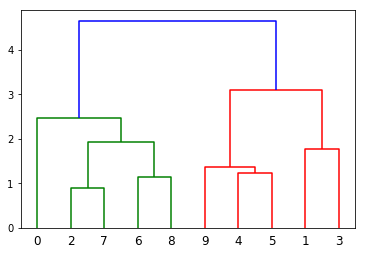

In [33]:
# Performing KMeans on the data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster, fclusterdata, dendrogram, leaders, linkage


n_clusters = 10

def get_cluster_stats(cluster_center, cluster_subset):
    intra_cluster_variance = np.var(cluster_subset)
    num_cluster_samples = cluster_subset.shape[0]
    return {
        'intra_cluster_variance': intra_cluster_variance,
        'num_cluster_samples': num_cluster_samples
    }

numeric_data = np.asarray(
    weekday_df[[f'ekw{i+1}' for i in range(48)]]
)

#clean up nans - this should have been weeded out in the previous cell anyway
nans = np.any(np.isnan(numeric_data), axis=1)
numeric_data = numeric_data[~nans]

kmeans = KMeans(
    n_clusters=n_clusters,
    max_iter=5,
    verbose=1
).fit(numeric_data)

cluster_indices = range(n_clusters)

# Plot a dendrogram relationship between cluster centers
linkage_matrix = linkage(kmeans.cluster_centers_, 'ward')
dendro = dendrogram(linkage_matrix, labels=cluster_indices)

In [30]:
kmeans.inertia_

264122.8028791186

# Plot K-Means Data

/Users/sarmadtarar/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/sarmadtarar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/sarmadtarar/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/sarmadtarar/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


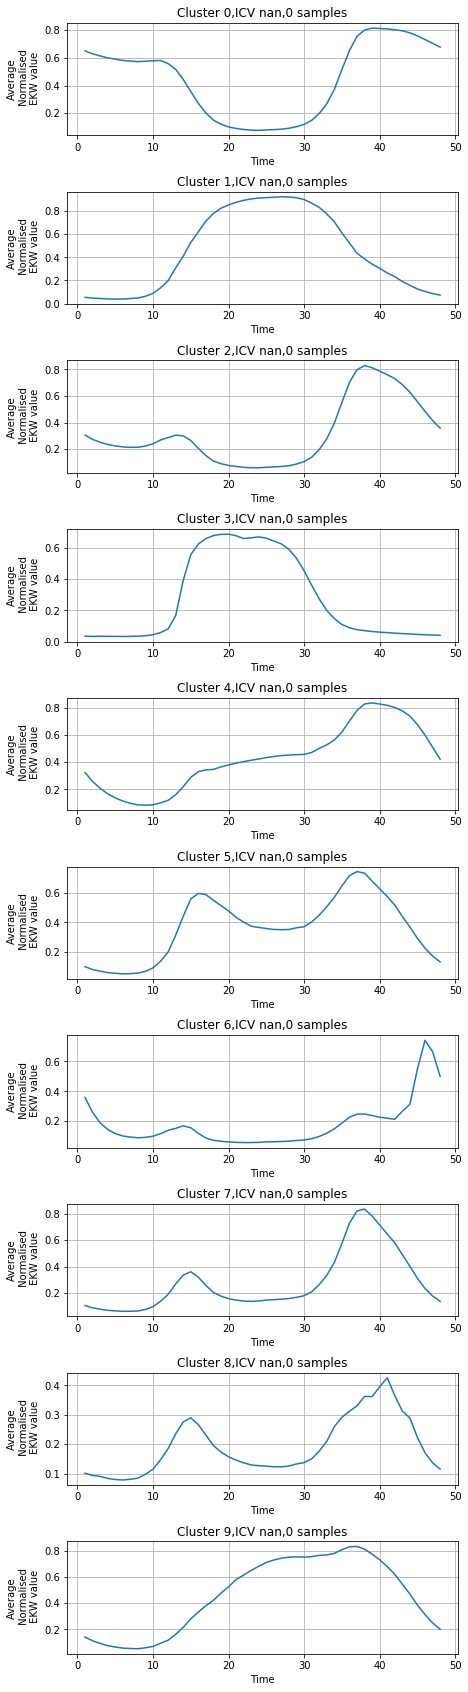

In [34]:
plt.figure(
    num='Cluster centres for each user\'s averaged, normalised weekend',
    figsize=(7, 30)
)

for i in range(n_clusters):
    cluster_subset = numeric_data[cluster_indices == i]
    cluster_stats = get_cluster_stats(kmeans.cluster_centers_[i, :], cluster_subset)
    
    plt.subplot(n_clusters, 1, i+1)
    plt.plot(range(1, 49), kmeans.cluster_centers_[i, :])
    plt.title(f'Cluster {i},ICV {cluster_stats["intra_cluster_variance"]:.2f},{cluster_stats["num_cluster_samples"]} samples')
    
    plt.grid('on')
    plt.ylabel('Average\n Normalised\n EKW value')
    plt.xlabel('Time')
    plt.subplots_adjust(hspace=0.5)